<a href="https://colab.research.google.com/github/bimal-bp/Water_Quality__Project/blob/main/waterquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2
import numpy as np

# Load the image
image_path = '/content/hamisar_lake.png'  # Update the path to your image file
image = cv2.imread(image_path)

# Check if the image loaded correctly
if image is None:
    raise FileNotFoundError(f"Failed to load image from {image_path}. Check the file path.")

# Convert the image to RGB and HSV
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define a mask for water regions (adjust HSV range based on your data)
lower_purple = np.array([120, 50, 50])  # Adjust based on water color
upper_purple = np.array([160, 255, 255])
mask = cv2.inRange(hsv_image, lower_purple, upper_purple)

# --- pH Calculation ---
blue_band = image_rgb[:, :, 2]  # Blue channel
nir_band = np.ones_like(blue_band) * 100  # Substitute NIR band with a constant value
nir_band = np.clip(nir_band, 1, None)  # Avoid divide-by-zero
ratio = blue_band.astype(float) / nir_band
pH = 8.399 - 0.827 * ratio
pH[mask == 0] = np.nan  # Mask non-water regions
average_pH = np.nanmean(pH)

# --- Hue Calculation ---
hue = hsv_image[:, :, 0]  # Extract hue channel
masked_hue = cv2.bitwise_and(hue, hue, mask=mask)
average_hue = np.nanmean(masked_hue[mask != 0])

# --- Floating Algal Index (FUI) Calculation ---
green_band = image_rgb[:, :, 1]  # Green channel
fui = (green_band.astype(float) - blue_band) / (green_band + blue_band + 1e-5)
fui[mask == 0] = np.nan  # Mask non-water regions
average_fui = np.nanmean(fui)

# --- Hardness Calculation (using red channel) ---
red_band = image_rgb[:, :, 0]
hardness = red_band.astype(float) * 0.05  # Scaling factor for demonstration
hardness[mask == 0] = np.nan  # Mask non-water regions
average_hardness = np.nanmean(hardness)

# --- Turbidity Calculation (using variance in HSV Value channel) ---
value_channel = hsv_image[:, :, 2]  # Value channel from HSV
turbidity = np.std(value_channel[mask != 0])  # Standard deviation as a proxy for turbidity

# --- Organic Carbon Calculation (using green channel) ---
organic_carbon = green_band.astype(float) * 0.03  # Scaling factor for demonstration
organic_carbon[mask == 0] = np.nan
average_organic_carbon = np.nanmean(organic_carbon)

# Display the results without units
print(f"Average pH of the water: {average_pH:.2f}")
print(f"Average Hue of the water: {average_hue:.2f}")
print(f"Average FUI of the water: {average_fui:.2f}")
print(f"Average Hardness: {average_hardness:.2f}")
print(f"Average Turbidity: {turbidity:.2f}")
print(f"Average Organic Carbon: {average_organic_carbon:.2f}")


Average pH of the water: 7.29
Average Hue of the water: 120.67
Average FUI of the water: -0.62
Average Hardness: 5.16
Average Turbidity: 21.44
Average Organic Carbon: 3.08


In [9]:
import pandas as pd
data=pd.read_csv('/content/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [10]:
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [11]:
data.shape

(3276, 10)

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [14]:
data.drop_duplicates(inplace=True)

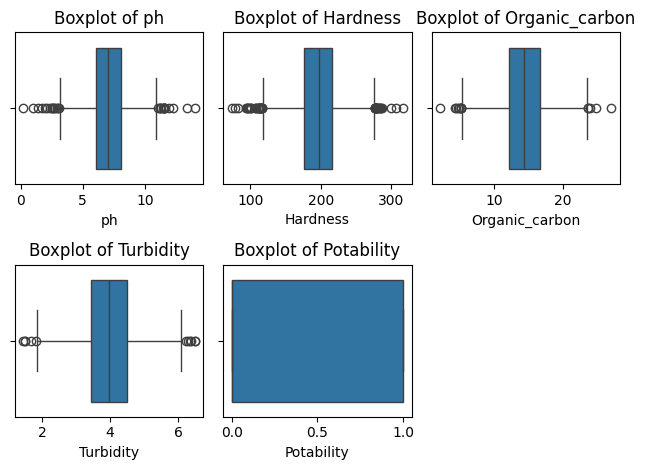

In [15]:
# Specify the columns you want to plot (if you want to use all columns, just use df.columns)
import matplotlib.pyplot as plt
import seaborn as sns
columns_to_plot = ['ph', 'Hardness', 'Organic_carbon', 'Turbidity', 'Potability']
# Loop over the selected columns and create a box plot for each
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i+1)  # Create a 2x3 grid of plots (adjust depending on the number of columns)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [16]:
# Loop through each column in the dataset and print its value counts
for column in data.columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print("\n" + "-"*50 + "\n")

Value counts for ph:
ph
8.316766    1
7.879543    1
9.467129    1
8.616824    1
8.028304    1
           ..
8.567044    1
7.765636    1
8.815358    1
6.664935    1
4.668102    1
Name: count, Length: 2011, dtype: int64

--------------------------------------------------

Value counts for Hardness:
Hardness
214.373394    1
170.190912    1
169.214407    1
228.762945    1
204.783735    1
             ..
160.217867    1
173.185569    1
208.331084    1
218.770008    1
193.681736    1
Name: count, Length: 2011, dtype: int64

--------------------------------------------------

Value counts for Solids:
Solids
22018.41744    1
37000.95567    1
33365.31542    1
19126.29854    1
20408.48560    1
              ..
23683.11019    1
13736.34204    1
26780.69179    1
16477.35081    1
47580.99160    1
Name: count, Length: 2011, dtype: int64

--------------------------------------------------

Value counts for Chloramines:
Chloramines
8.059332    1
6.217223    1
8.460490    1
7.017578    1
4.531581    1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [18]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


<ipython-input-19-7a0efa03c45a>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  var.hist(ax=ax)


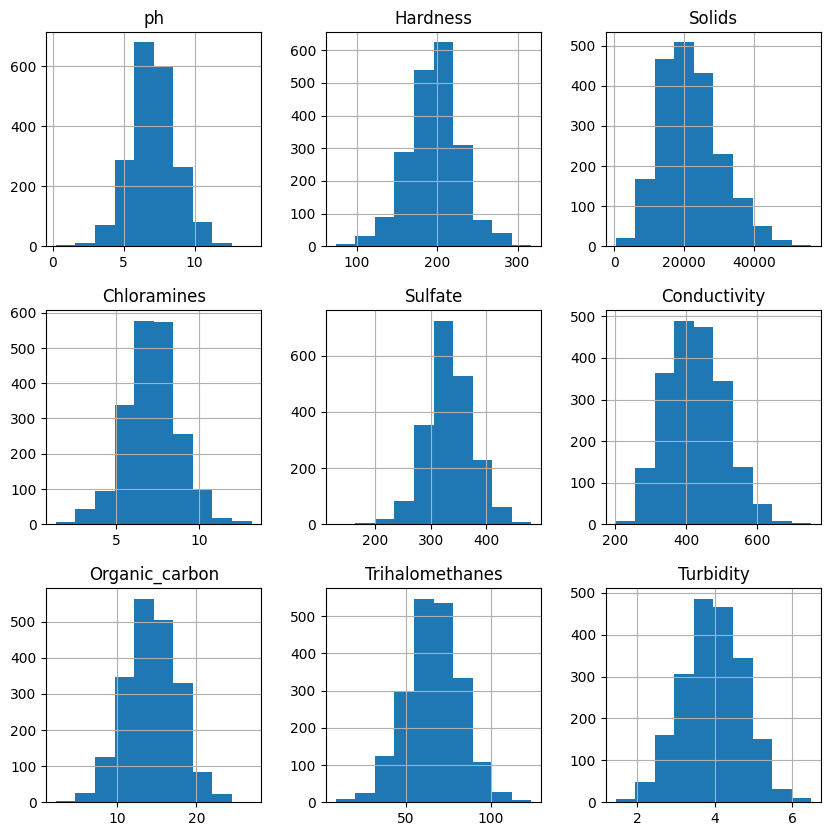

In [19]:
#Histograms
fig = plt.figure(figsize = (10,10))
var = data.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show();

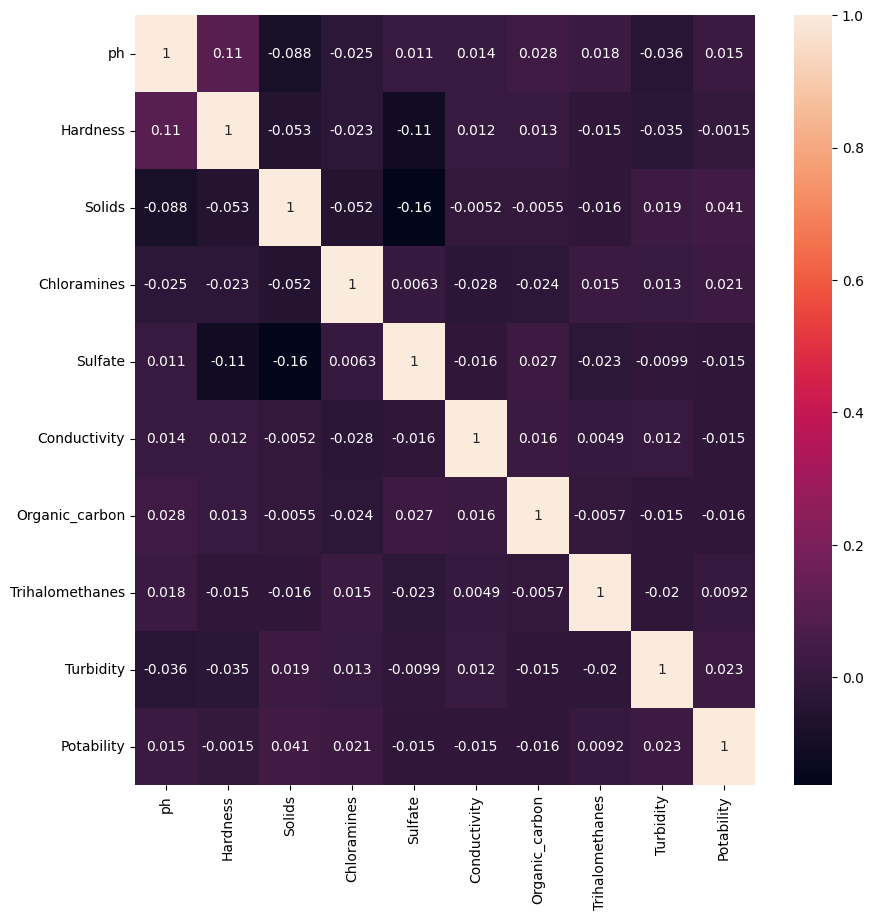

In [20]:
#hEAT MAP
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt=".2g")
plt.show()

In [21]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


In [22]:
# Model Algorithm
import numpy as np

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn import tree

#miscellaneous
import warnings
warnings.filterwarnings("ignore")

In [23]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [24]:
data['Potability'].value_counts()

,count
Potability,
0,1200
1,811


<Axes: xlabel='Potability', ylabel='count'>

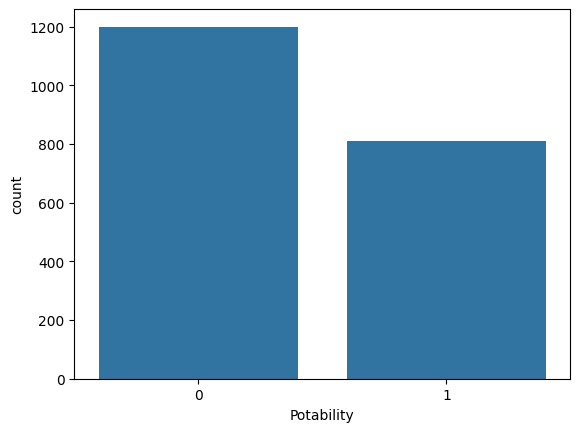

In [25]:
sns.countplot(x='Potability', data=data)

In [26]:
data['Potability'].value_counts()

,count
Potability,
0,1200
1,811


In [27]:
from imblearn.over_sampling import RandomOverSampler

# Balancing the target column
ros = RandomOverSampler(random_state=42)
_, data['Potability'] = ros.fit_resample(data.drop('Potability', axis=1), data['Potability'])


In [28]:
data['Potability'].value_counts()

,count
Potability,
1.0,747
0.0,728


In [29]:
x = data.drop("Potability", axis=1)
y = data.Potability
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

# **ALGORITHMS**


In [30]:
df=data.copy()

**KNN IMPLEMENTATION**

In [31]:
X = df.drop(['Potability'],axis=1)
Y = df['Potability']
X_stdscle = StandardScaler().fit_transform(X.values)

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Sample Data

# Create DataFrame
df = pd.DataFrame(data)

# Handle missing values (Fill NaN with median)
df.fillna(df.median(), inplace=True)

# Splitting Features and Target
X = df.drop(columns=["Potability"])
y = df["Potability"]

# Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into Training and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train XGBoost Model
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.5757


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Create DataFrame
df = pd.DataFrame(data)

# Handle missing values (Fill NaN with median)
df.fillna(df.median(), inplace=True)

# Splitting Features and Target
X = df.drop(columns=["Potability"])
y = df["Potability"]

# Scaling the Features using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into Training and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Train XGBoost Model with Optimized Parameters
model = XGBClassifier(
    n_estimators=300,  # More trees
    learning_rate=0.05,  # Lower learning rate
    max_depth=6,  # Moderate depth to avoid overfitting
    subsample=0.8,  # Prevent overfitting
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Optimized Model Accuracy: {accuracy:.4f}")


Optimized Model Accuracy: 0.5831


**DECISION TREE** **IMPLEMENTATION**

In [37]:
train_df=data.copy()

In [38]:
cond=train_df['Potability']==0

train_df['ph'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['ph'].median(),
                                False:train_df.loc[train_df['Potability']==1]['ph'].median()
                                }),inplace=True)

train_df['Sulfate'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['Sulfate'].median(),
                                False:train_df.loc[train_df['Potability']==1]['Sulfate'].median()
                                }),inplace=True)

train_df['Trihalomethanes'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['Trihalomethanes'].median(),
                                False:train_df.loc[train_df['Potability']==1]['Trihalomethanes'].median()
                                }),inplace=True)

In [39]:
#Min-Max range before scaling
train_df.describe().T[['min','max']].T

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.0
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.0


In [40]:

input_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [41]:
scaler = MinMaxScaler()
scaler.fit(train_df[input_cols])
train_df[input_cols] = scaler.transform(train_df[input_cols])
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115,0.0
4,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358,0.0
5,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973,0.0
6,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428,0.0
7,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049,0.0


In [42]:
#Seperating Response Variable from the dataset
X=train_df.drop('Potability',axis=1)
y=train_df['Potability']

In [43]:
#train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [44]:
clf=DecisionTreeClassifier(random_state=41,max_depth=6,min_samples_split=0.03)
clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
pred=clf.predict(X_train)
print("Accuracy of training data :",accuracy_score( y_train.values,pred))
print("Accuracy of validation data :",accuracy_score(y_test.values,Y_pred))

Accuracy of training data : 0.6816976127320955
Accuracy of validation data : 0.6302186878727635


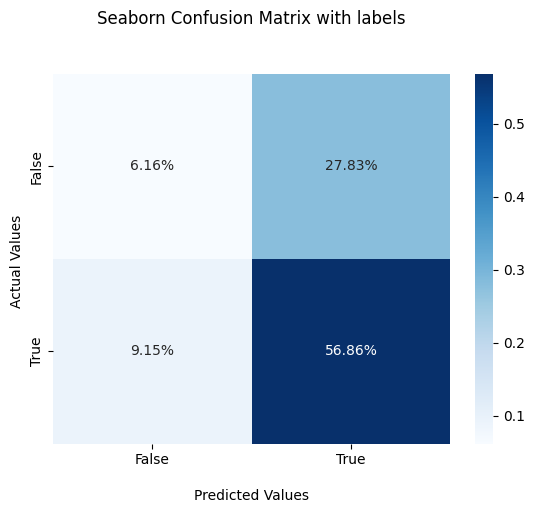

In [45]:
cf_matrix=confusion_matrix(y_test,Y_pred)
labels=['True Negative','False Positive','False Negative','True Positive']
labels=np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

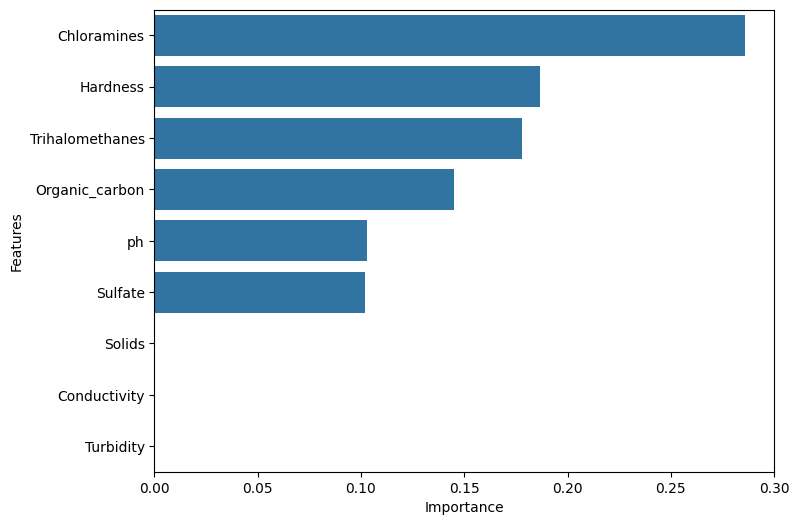

In [46]:
feature_importance = pd.DataFrame({'Features':X.columns,
                                   'Importance':clf.feature_importances_
                                  }).sort_values('Importance', ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Features']);

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=41, max_depth=6, min_samples_split=0.03)
rf_clf.fit(X_train, y_train)

rf_train_pred = rf_clf.predict(X_train)
rf_test_pred = rf_clf.predict(X_test)

print("Random Forest - Accuracy of training data:", accuracy_score(y_train.values, rf_train_pred))
print("Random Forest - Accuracy of validation data:", accuracy_score(y_test.values, rf_test_pred))


Random Forest - Accuracy of training data: 0.6777188328912467
Random Forest - Accuracy of validation data: 0.6560636182902585


In [50]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=41, max_depth=6, learning_rate=0.1, n_estimators=100)
xgb_clf.fit(X_train, y_train)

xgb_train_pred = xgb_clf.predict(X_train)
xgb_test_pred = xgb_clf.predict(X_test)

print("XGBoost - Accuracy of training data:", accuracy_score(y_train.values, xgb_train_pred))
print("XGBoost - Accuracy of validation data:", accuracy_score(y_test.values, xgb_test_pred))


XGBoost - Accuracy of training data: 0.9675066312997348
XGBoost - Accuracy of validation data: 0.6222664015904572


In [49]:
! pip install catboost
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(depth=6, random_seed=41, verbose=0)
cb_clf.fit(X_train, y_train)

cb_train_pred = cb_clf.predict(X_train)
cb_test_pred = cb_clf.predict(X_test)

print("CatBoost - Accuracy of training data:", accuracy_score(y_train.values, cb_train_pred))
print("CatBoost - Accuracy of validation data:", accuracy_score(y_test.values, cb_test_pred))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00
CatBoost - Accuracy of training data: 0.9058355437665783
CatBoost - Accuracy of validation data: 0.6620278330019881


CatBoost - Accuracy of training data: 0.9058355437665783
CatBoost - Accuracy of validation data: 0.6620278330019881


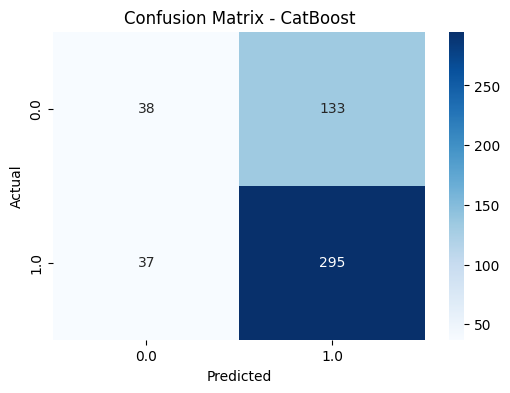

Model saved as 'catboost_model.pkl'


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Install CatBoost if not installed
# !pip install catboost

# Initialize CatBoost Classifier
cb_clf = CatBoostClassifier(depth=6, random_seed=41, verbose=0)
cb_clf.fit(X_train, y_train)

# Predictions
cb_train_pred = cb_clf.predict(X_train)
cb_test_pred = cb_clf.predict(X_test)

# Accuracy
print("CatBoost - Accuracy of training data:", accuracy_score(y_train.values, cb_train_pred))
print("CatBoost - Accuracy of validation data:", accuracy_score(y_test.values, cb_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, cb_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()

# Save the model as a .pkl file
with open("catboost_model.pkl", "wb") as model_file:
    pickle.dump(cb_clf, model_file)

print("Model saved as 'catboost_model.pkl'")


- CatBoost - Accuracy of training data: 0.9058355437665783

- CatBoost - Accuracy of validation data: 0.6620278330019881